In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [19]:
df = pd.read_csv('dal_final.csv')
df.head()

,Unnamed: 0,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,Secs,...,M1,E2,M2,E3,M3,M4,E4,M5,E5,Quality
0,1,188.0,115.0,86.0,29.1,2022-07-04,21:43:12,21,43,12,...,188.0,115.000000,188.000000,0.000000,0.000000,0.010426,0.007461,0.984227,1.000000,9.921136
1,2,185.0,119.0,86.0,29.0,2022-07-04,21:43:30,21,43,30,...,185.0,119.000000,185.000000,0.000000,0.000000,0.010449,0.007298,0.993691,0.990123,9.919072
2,3,186.0,115.0,87.0,29.1,2022-07-04,21:43:47,21,43,47,...,185.4,116.374079,185.385781,1.305374,1.023719,0.010415,0.007311,0.990536,1.000000,9.952681
3,4,185.0,115.0,88.0,29.3,2022-07-04,21:44:04,21,44,4,...,184.8,116.577477,184.794781,1.305374,1.058301,0.010438,0.007273,0.993691,1.000000,9.968454
4,5,183.0,118.0,88.0,29.3,2022-07-04,21:44:21,21,44,21,...,185.2,115.989743,185.190471,1.488624,1.091788,0.010460,0.007273,1.000000,0.992593,9.962963


In [20]:
def rate(initial, final):
    diff = ((df.Day[final] - df.Day[initial])*24 + (df.Hour[final] - df.Hour[initial]))*60 + (df.Mins[final] - df.Mins[initial])
    rate = (df.Quality[initial] - df.Quality[final]) / diff    
    return(rate)

    
print(rate(1, 719))
print(rate(719, 1228))
print(rate(1229, 2511))
print(rate(2512, 4230))

0.003669723415962117
0.0022482562924481674
0.0021823159281441217
0.010626187077060761


In [21]:
df.drop(columns={'Unnamed: 0', 'E1', 'E2', 'E3', 'E4', 'E5', 'M1', 'M2','M3', 'M4', 'M5'}, inplace=True, axis=1)
df

,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,Secs,Year,Month,Day,Quality
0,188.0,115.0,86.0,29.1,2022-07-04,21:43:12,21,43,12,2022,7,4,9.921136
1,185.0,119.0,86.0,29.0,2022-07-04,21:43:30,21,43,30,2022,7,4,9.919072
2,186.0,115.0,87.0,29.1,2022-07-04,21:43:47,21,43,47,2022,7,4,9.952681
3,185.0,115.0,88.0,29.3,2022-07-04,21:44:04,21,44,4,2022,7,4,9.968454
4,183.0,118.0,88.0,29.3,2022-07-04,21:44:21,21,44,21,2022,7,4,9.962963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,411.0,421.0,95.0,31.9,2022-07-05,18:17:24,18,17,24,2022,7,5,2.626008
4236,408.0,420.0,95.0,31.9,2022-07-05,18:17:41,18,17,41,2022,7,5,2.685672
4237,408.0,420.0,95.0,31.9,2022-07-05,18:17:58,18,17,58,2022,7,5,2.685672
4238,408.0,425.0,95.0,32.0,2022-07-05,18:18:15,18,18,15,2022,7,5,2.623944


In [22]:
##sns.pairplot(df)

<AxesSubplot:>

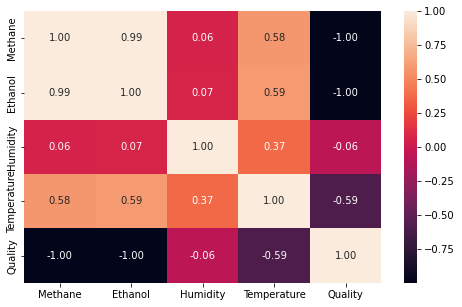

In [23]:
df.drop(columns={'Date', 'Time', 'Hour', 'Mins', 'Secs', 'Year', 'Month', 'Day'}, inplace=True, axis=1)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)


In [24]:
X = df.loc[:, 'Methane':'Temperature']
y = df.loc[:, 'Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [25]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
y_prediction =  LR.predict(X_test)
y_prediction

array([8.69965339, 8.78813724, 8.01659072, ..., 9.21676987, 9.27507108,
       9.48288351])

In [27]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9988773186487142
mean_sqrd_error is== 0.005618454111750117
root_mean_squared error of is== 0.07495634804171103


In [28]:
df = pd.read_csv('Merged/DAL_MERGED.csv')
df.head()

,Unnamed: 0,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,...,M1,E2,M2,E3,M3,M4,E4,M5,E5,Quality
0,1,2022-07-04T21:43:12+05:30,188,115,86,29.1,04-07-2022,21:43:12,21,43,...,188.0,115.000000,188.000000,0.000000,0.000000,0.010426,0.007461,0.973801,0.992539,9.831698
1,2,2022-07-04T21:43:30+05:30,185,119,86,29.0,04-07-2022,21:43:30,21,43,...,185.0,119.000000,185.000000,0.000000,0.000000,0.010449,0.007298,0.983242,0.982312,9.827771
2,3,2022-07-04T21:43:47+05:30,186,115,87,29.1,04-07-2022,21:43:47,21,43,...,185.4,116.374079,185.385782,1.305374,1.023719,0.010415,0.007311,0.982036,0.989087,9.855615
3,4,2022-07-04T21:44:04+05:30,185,115,88,29.3,04-07-2022,21:44:04,21,44,...,184.8,116.577477,184.794781,1.305374,1.058301,0.010438,0.007273,0.983892,0.988601,9.862464
4,5,2022-07-04T21:44:21+05:30,183,118,88,29.3,04-07-2022,21:44:21,21,44,...,185.2,115.989743,185.190471,1.488624,1.091788,0.010460,0.007273,0.982615,0.990143,9.863789


In [29]:
df.drop(columns={'Unnamed: 0', 'E1', 'E2', 'E3', 'E4', 'E5', 'M1', 'M2','M3', 'M4', 'M5',}, inplace=True, axis=1)
df

,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,Secs,Year,Month,Day,Quality
0,2022-07-04T21:43:12+05:30,188,115,86,29.1,04-07-2022,21:43:12,21,43,12,2022,7,4,9.831698
1,2022-07-04T21:43:30+05:30,185,119,86,29.0,04-07-2022,21:43:30,21,43,30,2022,7,4,9.827771
2,2022-07-04T21:43:47+05:30,186,115,87,29.1,04-07-2022,21:43:47,21,43,47,2022,7,4,9.855615
3,2022-07-04T21:44:04+05:30,185,115,88,29.3,04-07-2022,21:44:04,21,44,4,2022,7,4,9.862464
4,2022-07-04T21:44:21+05:30,183,118,88,29.3,04-07-2022,21:44:21,21,44,21,2022,7,4,9.863789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,2022-07-05T18:17:07+05:30,407,425,95,32.0,05-07-2022,18:17:07,18,17,7,2022,7,5,2.219030
4235,2022-07-05T18:17:24+05:30,411,421,95,31.9,05-07-2022,18:17:24,18,17,24,2022,7,5,2.218222
4236,2022-07-05T18:17:41+05:30,408,420,95,31.9,05-07-2022,18:17:41,18,17,41,2022,7,5,2.208665
4237,2022-07-05T18:17:58+05:30,408,420,95,31.9,05-07-2022,18:17:58,18,17,58,2022,7,5,2.241860


xpoints = df.Time
ypoints = df.Quality
x_label = "Time"
y_label = "Quality"

plt.figure(figsize=(40,20))
plt.plot(xpoints, ypoints)

In [14]:
X = df.loc[:, 'Methane':'Temperature']
y = df.loc[:, 'Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [16]:
y_prediction =  LR.predict(X_test)
y_prediction

array([5.30828341, 9.08972573, 4.99233679, ..., 9.36696846, 8.31355045,
       8.0960707 ])

In [17]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9995201164969995
mean_sqrd_error is== 0.0025659573801077645
root_mean_squared error of is== 0.0506552798838163


In [18]:
pickle.dump(LR, open('model.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))

In [19]:
filename = 'trained_model.sav'
pickle.dump(LR, open(filename, 'wb'))

In [20]:
## Data is fed into model. Model predicts q1,q2,q3 three times in one minute. Then return Quality = q1+q2+q3/3. 
##Then return timetaken function  


def timetaken(quality):
    if (quality>=9.15):
        time = (quality - 9.15 ) / rate(1, 719)
        print("Food is fresh. Consume it under ", round(time) , " mins")
    if (quality>=8.7 and quality < 9.15):
        time = (quality - 8.7 ) / rate(719, 1228)
        print("Food is cold and needs to be reheated. Heat and eat before", round(time) ," mins")
    if (quality>=7.8 and quality < 8.7) :
        time = (quality - 7.8 ) /  rate(1229, 2511)
        print("Time left to spoil=" , round(time) ," mins. Store in the refrigerator before", round(time) ,"mins")
    elif (quality< 7.8):
        print("Food is spoiled, discard it.")

        
timetaken(8.6758673457826789)        

Time left to spoil= 358  mins. Store in the refrigerator before 358 mins


In [21]:
"""import requests
import time
import json

url1 = "https://api.thingspeak.com/channels/1785779/feeds/last.json?api_key=64LX24ENHBDW3JZV"
url2 = "https://api.thingspeak.com/channels/1780792/feeds/last.json?api_key=6PKCOVRLO9U2HFJ7"
url3 = "https://api.thingspeak.com/channels/1744711/feeds/last.json?api_key=LQYCBT76OZKU05HV"
url4 = "https://api.thingspeak.com/channels/1744701/feeds/last.json?api_key=2HY016JWRK0O7IFI"

while True:
    response1 = requests.get(url1)
    data_disc1 = json.loads(response1.text)
    print("Methane: ", data_disc1['field1'])

    response2 = requests.get(url2)
    data_disc2 = json.loads(response2.text)
    print("Ethanol: ", data_disc2['field1'])

    response3 = requests.get(url3)
    data_disc3 = json.loads(response3.text)
    print("Humidity: ", data_disc3['field1'])

    response4 = requests.get(url4)
    data_disc4 = json.loads(response4.text)
    print("Temperature: ", data_disc4['field1'])

    time.sleep(30)

""" 

'import requests\nimport time\nimport json\n\nurl1 = "https://api.thingspeak.com/channels/1785779/feeds/last.json?api_key=64LX24ENHBDW3JZV"\nurl2 = "https://api.thingspeak.com/channels/1780792/feeds/last.json?api_key=6PKCOVRLO9U2HFJ7"\nurl3 = "https://api.thingspeak.com/channels/1744711/feeds/last.json?api_key=LQYCBT76OZKU05HV"\nurl4 = "https://api.thingspeak.com/channels/1744701/feeds/last.json?api_key=2HY016JWRK0O7IFI"\n\nwhile True:\n    response1 = requests.get(url1)\n    data_disc1 = json.loads(response1.text)\n    print("Methane: ", data_disc1[\'field1\'])\n\n    response2 = requests.get(url2)\n    data_disc2 = json.loads(response2.text)\n    print("Ethanol: ", data_disc2[\'field1\'])\n\n    response3 = requests.get(url3)\n    data_disc3 = json.loads(response3.text)\n    print("Humidity: ", data_disc3[\'field1\'])\n\n    response4 = requests.get(url4)\n    data_disc4 = json.loads(response4.text)\n    print("Temperature: ", data_disc4[\'field1\'])\n\n    time.sleep(30)\n\n'